#### Importing Libraries 

In [1]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Reading File

In [2]:
df = pd.read_csv("kag_risk_factors_cervical_cancer.csv")

## Data Preprocessing

##### Describing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [4]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Drop duplicates

In [5]:
df.drop_duplicates()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


##### Finding columns with many ?

In [6]:
for item in df.columns:
    count = np.array(df[f'{item}'] == '?').sum()
    if count > 200:
        print (item)

STDs: Time since first diagnosis
STDs: Time since last diagnosis


##### Drop these 2 columns

In [7]:
for item in df.columns:
    count = np.array(df[f'{item}'] == '?').sum()
    if count > 200:
        df.drop(columns=item)

##### Replace all question marks with mean values

In [8]:
for item in df.columns:
  mean = np.array(df[f'{item}'] != "?").mean()
  df[item] = df[item].replace({"?": mean})

##### Convert all columns to integers

In [9]:
for col in df.columns:
    df[col] = df[col].apply(pd.to_numeric, errors="coerce")
    df[col] = df[col].astype(int)

##### Describing Data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Age                                 858 non-null    int32
 1   Number of sexual partners           858 non-null    int32
 2   First sexual intercourse            858 non-null    int32
 3   Num of pregnancies                  858 non-null    int32
 4   Smokes                              858 non-null    int32
 5   Smokes (years)                      858 non-null    int32
 6   Smokes (packs/year)                 858 non-null    int32
 7   Hormonal Contraceptives             858 non-null    int32
 8   Hormonal Contraceptives (years)     858 non-null    int32
 9   IUD                                 858 non-null    int32
 10  IUD (years)                         858 non-null    int32
 11  STDs                                858 non-null    int32
 12  STDs (nu

# Data Normalization

In [11]:
for item in df.columns:
    tenth_perc = np.percentile(df[item], 10)
    ninty_perc = np.percentile(df[item], 90)
    b = np.where(df[item]>ninty_perc, ninty_perc, df[item])
    b = np.where(df[item]<tenth_perc, tenth_perc, df[item])

# Data Visualization

##### Creating new columns for data visualization

###### Total STDs

In [12]:
std_cols = {'STDs:condylomatosis',
            'STDs:cervical condylomatosis',
            'STDs:vaginal condylomatosis',
            'STDs:vulvo-perineal condylomatosis',
            'STDs:syphilis',
            'STDs:pelvic inflammatory disease',
            'STDs:genital herpes',
            'STDs:molluscum contagiosum',
            'STDs:AIDS',
            'STDs:HIV',
            'STDs:Hepatitis B',
            'STDs:HPV'}

df["total_std"] = df[list(std_cols)].sum(axis=1)

###### Age Categorization

In [13]:
def age_cat(age):
    if age < 12:
        return "Child"
    elif age < 20:
        return "Teen"
    elif age < 30:
        return "20's"
    elif age < 40:
        return "30's"
    elif age < 50:
        return "40's"
    elif age < 60:
        return "50's"
    elif age < 70:
        return "60's"
    else:
        return "70+"
    
df["Age"] = df["Age"].astype(int)
df["age_cat"] = df["Age"].apply(age_cat)

<AxesSubplot:title={'center':'Number of sexual partners'}, xlabel='age_cat'>

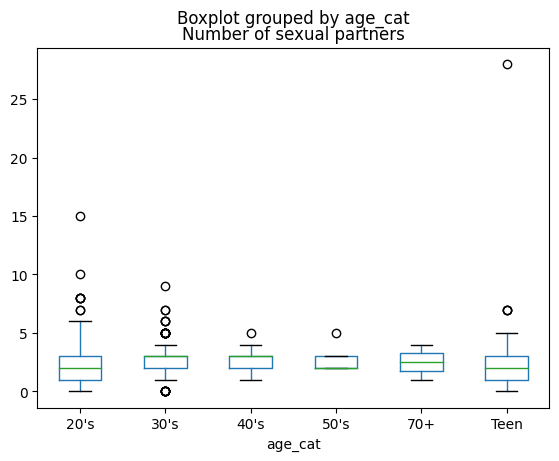

In [14]:
df.boxplot(by ='age_cat', column =['Number of sexual partners'], grid = False)

<AxesSubplot:title={'center':'First sexual intercourse'}, xlabel='age_cat'>

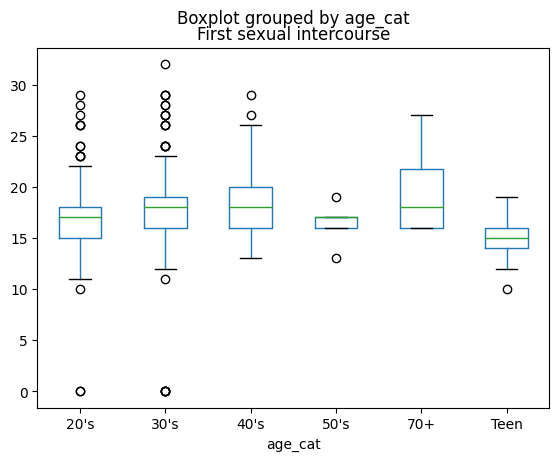

In [15]:
df.boxplot(by ='age_cat', column =['First sexual intercourse'], grid = False)

<AxesSubplot:title={'center':'Num of pregnancies'}, xlabel='age_cat'>

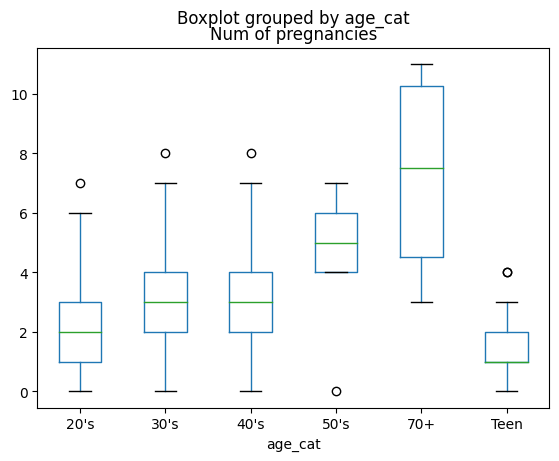

In [16]:
df.boxplot(by ='age_cat', column =['Num of pregnancies'], grid = False)

<AxesSubplot:title={'center':'total_std'}, xlabel='age_cat'>

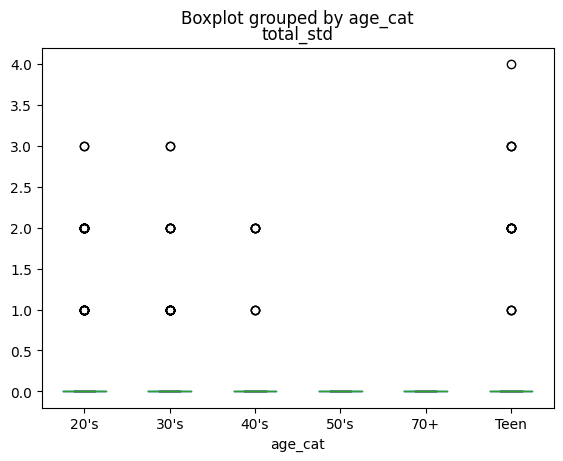

In [17]:
df.boxplot(by ='age_cat', column =['total_std'], grid = False)

Text(0.5, 1.0, 'Distribution of women by age')

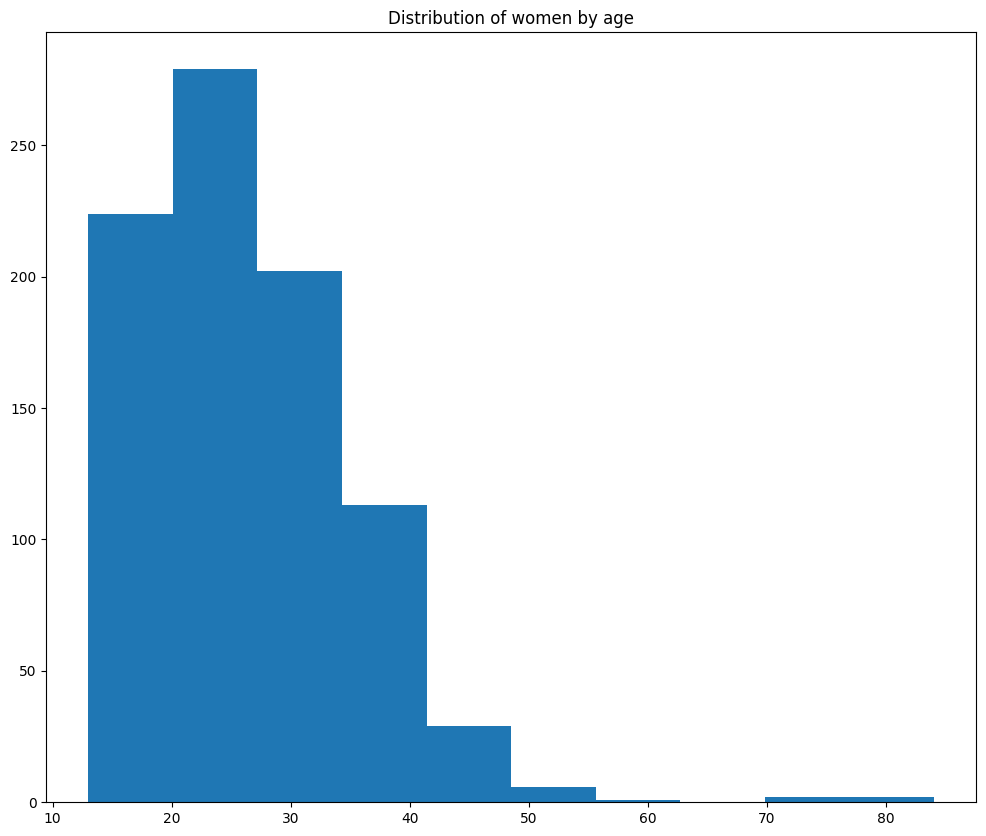

In [18]:
plt.figure(figsize=(12,10))
plt.hist(df["Age"])
plt.title("Distribution of women by age")

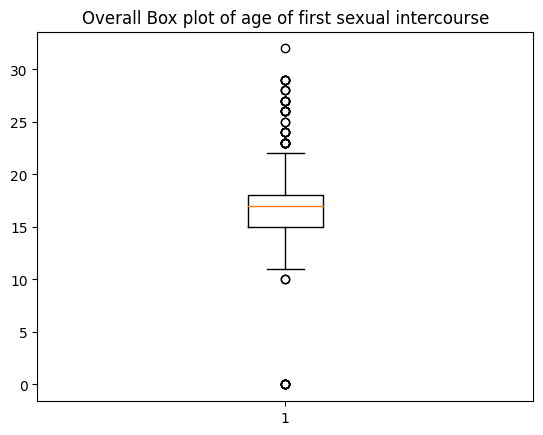

In [19]:
plt.boxplot(df["First sexual intercourse"])
plt.title("Overall Box plot of age of first sexual intercourse")
plt.show()

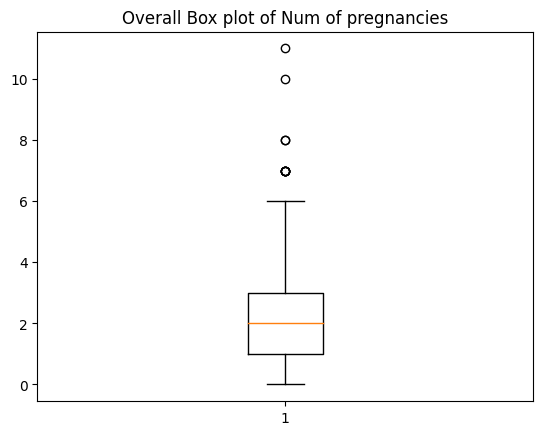

In [20]:
plt.boxplot(df["Num of pregnancies"])
plt.title("Overall Box plot of Num of pregnancies")
plt.show()

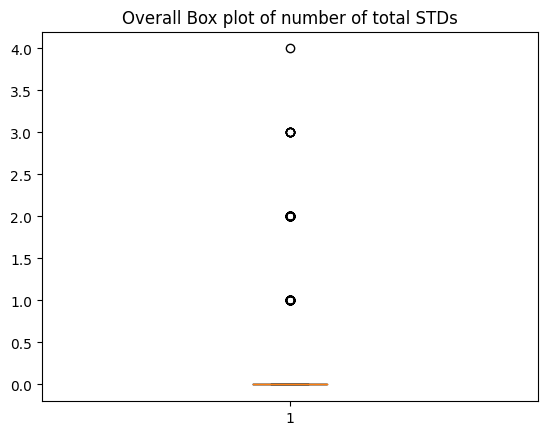

In [21]:
plt.boxplot(df["total_std"])
plt.title("Overall Box plot of number of total STDs")
plt.show()

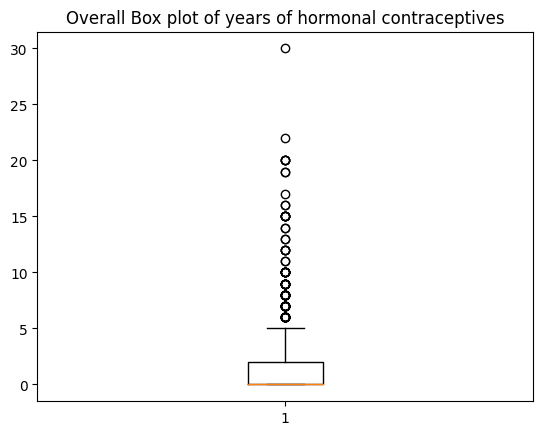

In [22]:
plt.boxplot(df["Hormonal Contraceptives (years)"])
plt.title("Overall Box plot of years of hormonal contraceptives")
plt.show()

<AxesSubplot:title={'center':'Number of sexual partners'}, xlabel='total_std'>

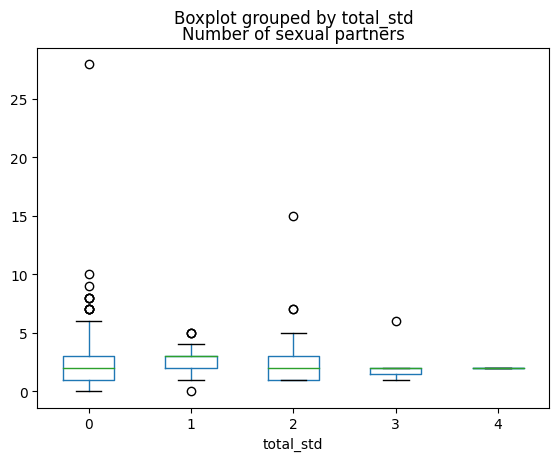

In [23]:
df.boxplot(by ='total_std', column =['Number of sexual partners'], grid = False)

<AxesSubplot:title={'center':'Hormonal Contraceptives (years)'}, xlabel='age_cat'>

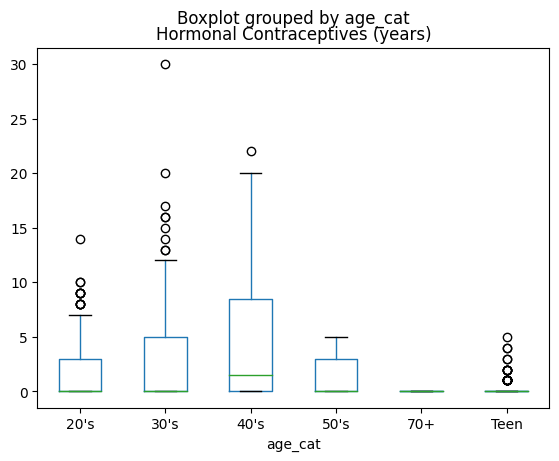

In [24]:
df.boxplot(by ='age_cat', column =['Hormonal Contraceptives (years)'], grid = False)

<AxesSubplot:title={'center':'Smokes (years)'}, xlabel='age_cat'>

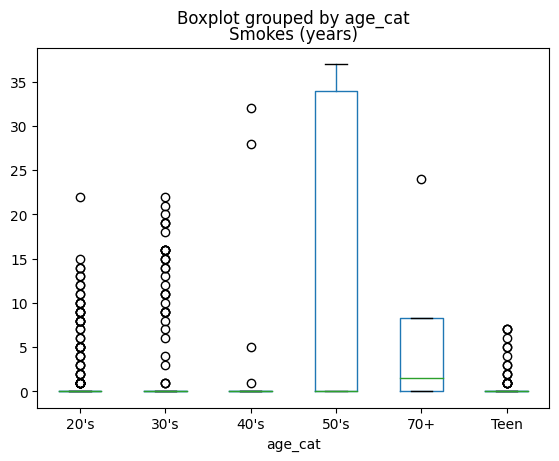

In [25]:
df.boxplot(by ='age_cat', column =['Smokes (years)'], grid = False)

<AxesSubplot:title={'center':'Smokes (packs/year)'}, xlabel='age_cat'>

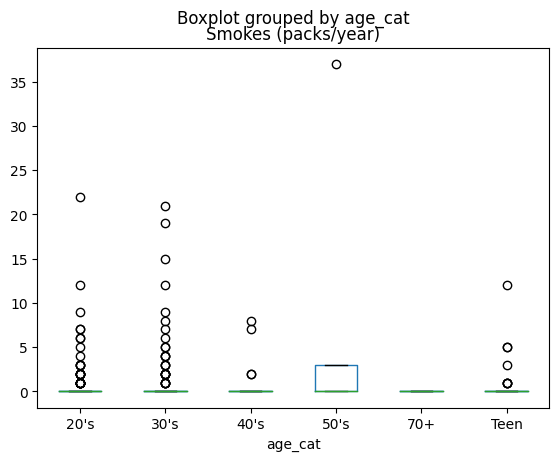

In [26]:
df.boxplot(by ='age_cat', column =['Smokes (packs/year)'], grid = False)

<AxesSubplot:title={'center':'IUD (years)'}, xlabel='age_cat'>

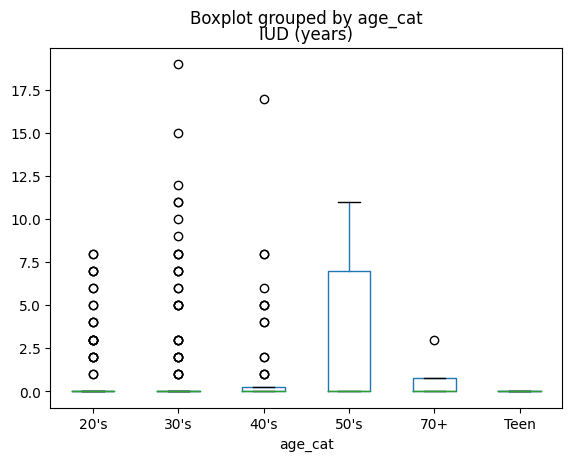

In [27]:
df.boxplot(by ='age_cat', column =['IUD (years)'], grid = False)

Text(0.5, 1.0, 'Distribution of women by age in which cancer is detected')

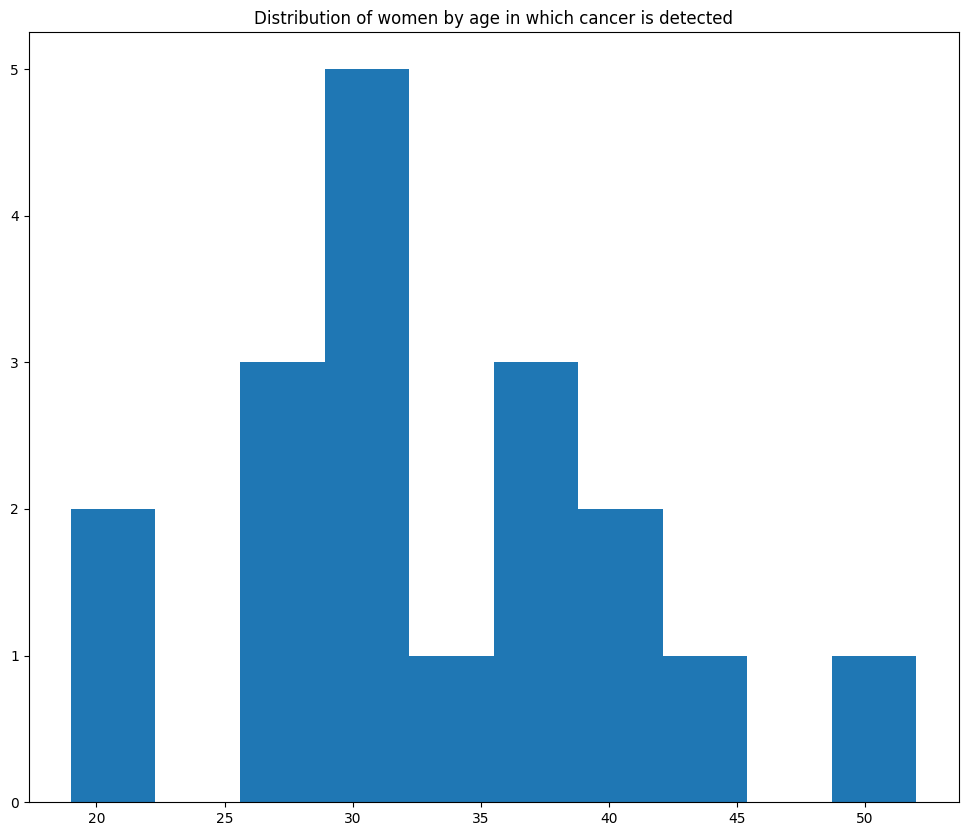

In [28]:
list1 = df[df['Dx:Cancer'] == 1] 
list1 = list1["Age"]

plt.figure(figsize=(12,10))
plt.hist(list1)
plt.title("Distribution of women by age in which cancer is detected")



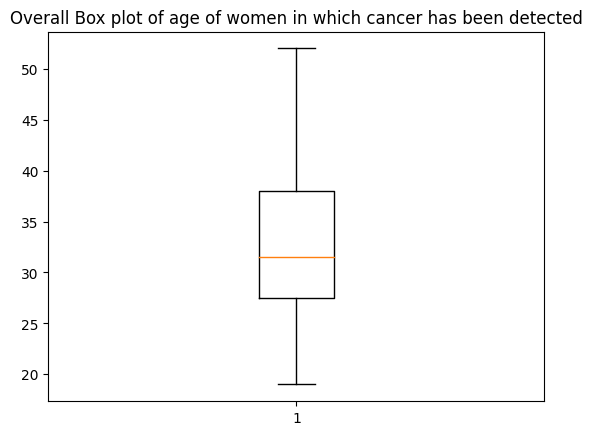

In [29]:
plt.boxplot(list1)
plt.title("Overall Box plot of age of women in which cancer has been detected")
plt.show()

# Target 1 : Hinselmann

#### Co-relation with other features

<AxesSubplot:title={'center':'Top 10 Features Correlated With Hinselmann'}>

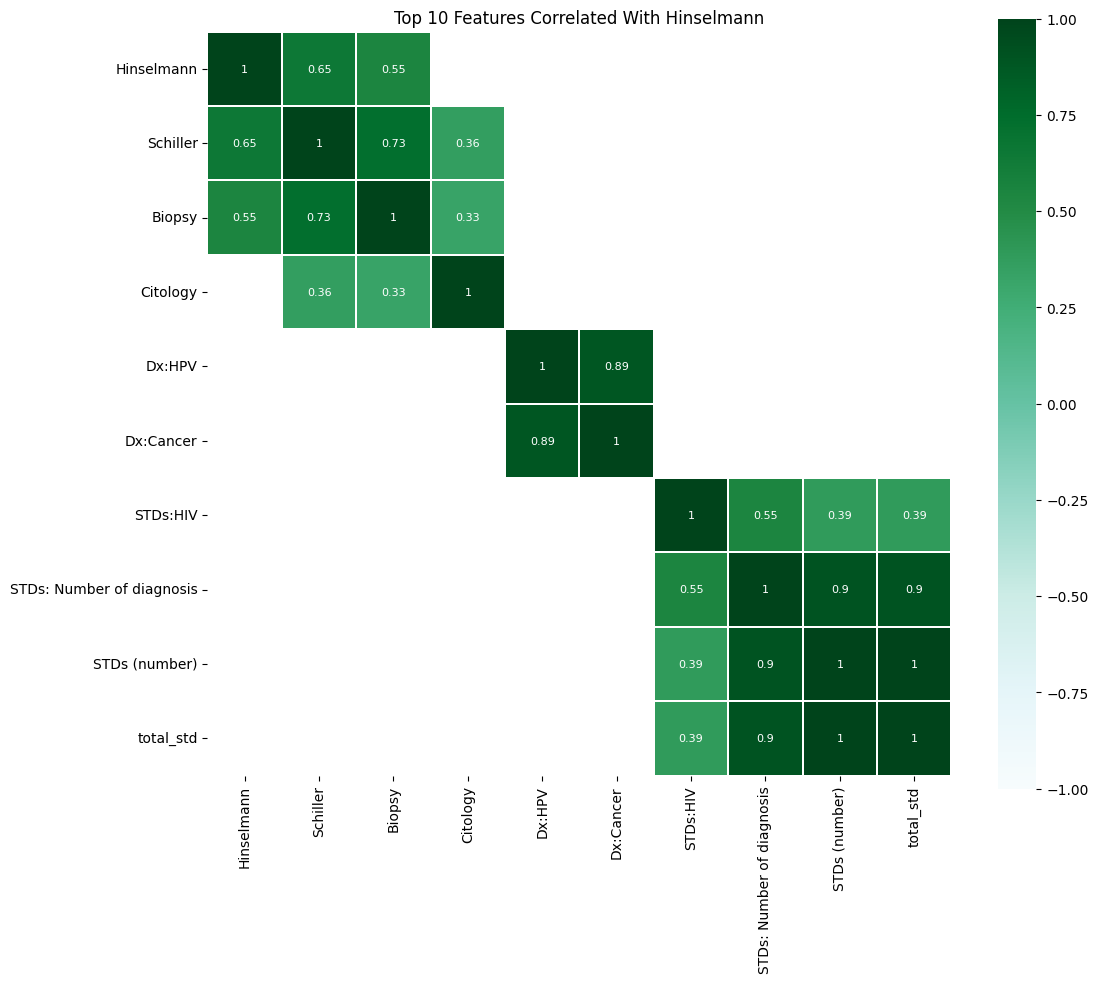

In [30]:
n = 10
corr = df.select_dtypes(include=np.number).corr()
x = corr.nlargest(n,"Hinselmann").index
corr_df =  df[list(x)]
corr = corr_df.corr()
plt.figure(figsize=(12, 10))
plt.title("Top "+str(n)+" Features Correlated With "+str("Hinselmann").capitalize())
sns.heatmap(corr[(corr >= 0.2) | (corr <= -0.2)],cmap='BuGn', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True)

### Visualizing the imbalance of data

(array([823.,   0.,  35.]),
 array([0. , 0.2, 0.8, 1. ]),
 <BarContainer object of 3 artists>)

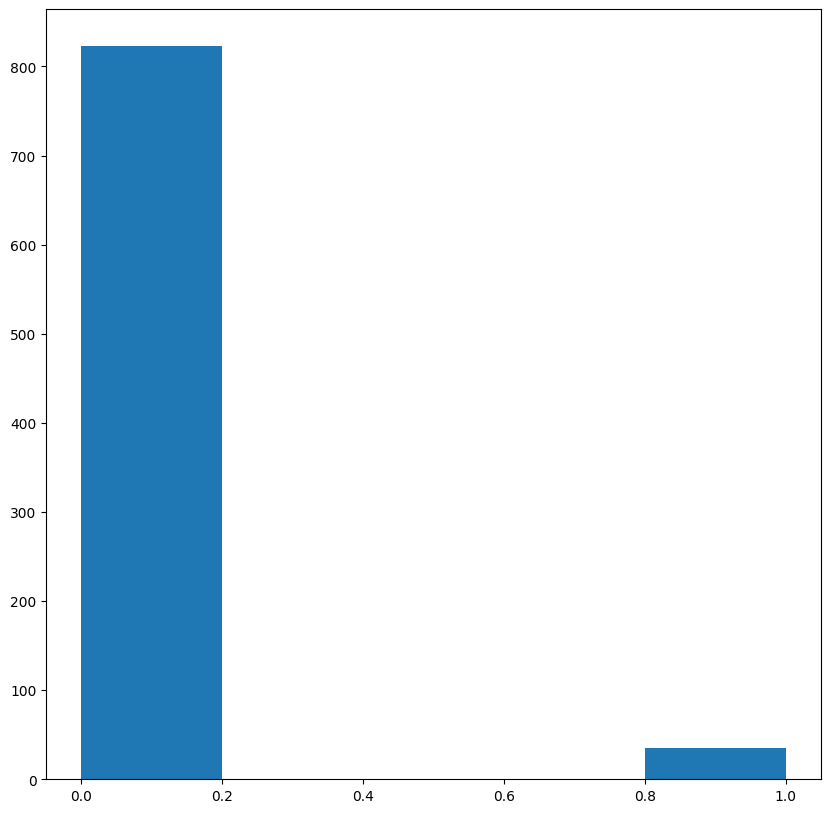

In [31]:
plt.figure(figsize = (10,10))
plt.hist(df["Hinselmann"],bins=[0, 0.2, 0.8, 1])

##### We see high imbalance in data

In [32]:
X = df.drop(["Hinselmann", "age_cat"], axis=1)
y = df["Hinselmann"].copy()

### Balancing the Data

In [33]:
adasyn = ADASYN(random_state=42)
x_adasyn,y_adasyn = adasyn.fit_resample(X,y)
df = x_adasyn.join(y_adasyn)

Again, add Age_categorization field (Used in train - test split)

In [34]:
df["age_cat"] = df["Age"].apply(age_cat)

### Visualizing the balance of data

(array([823.,   0., 825.]),
 array([0. , 0.2, 0.8, 1. ]),
 <BarContainer object of 3 artists>)

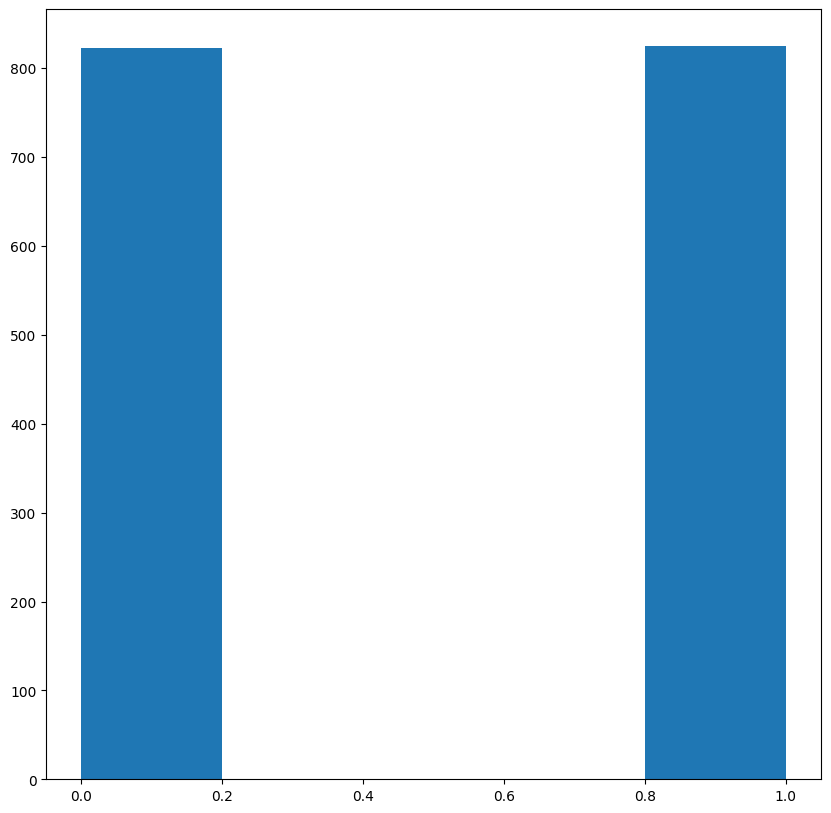

In [35]:
plt.figure(figsize = (10,10))
plt.hist(df["Hinselmann"],bins=[0, 0.2, 0.8, 1])

## Train - Test Split

### We split the train and test by stratifying the age category

In [36]:
train_set = None
test_set = None 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
for train_idx, test_idx in split.split(df, df["age_cat"]):
    train_set = df.loc[train_idx]
    test_set = df.loc[test_idx]

#### Drop the extra columns added

In [37]:
cols_to_drop = ["age_cat","total_std"]
for set_ in (train_set, test_set):
    for col in cols_to_drop:
        set_.drop(col, axis=1, inplace=True)

#### Split input and output of train and test data

In [38]:
X_train = train_set.drop("Hinselmann", axis=1)
y_train = train_set["Hinselmann"].copy()

X_test = test_set.drop("Hinselmann", axis=1)
y_test = test_set["Hinselmann"].copy()

## PCA Visualization

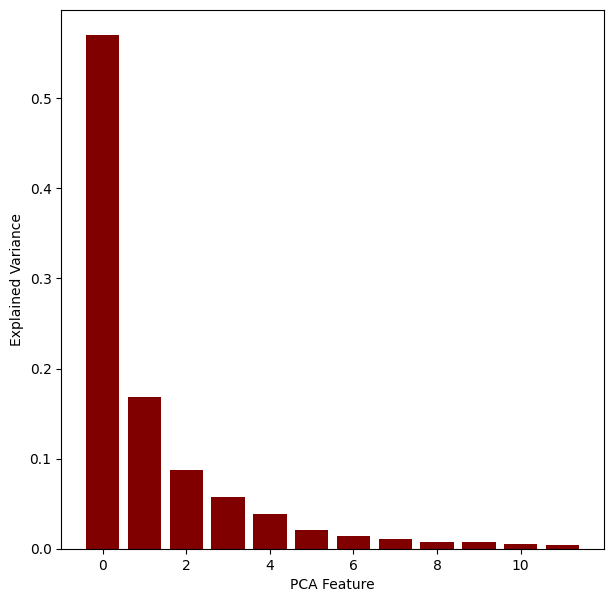

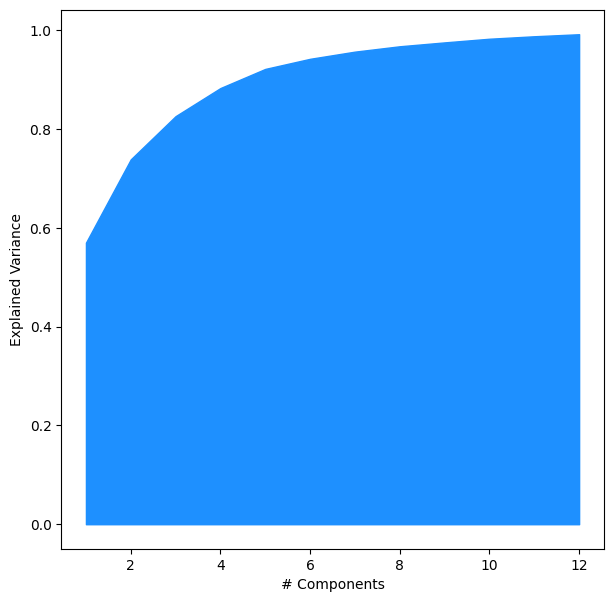

In [39]:
XT = RobustScaler().fit_transform(X_train)
pca = PCA(n_components=0.99)
XT = pca.fit_transform(XT)

fig = plt.figure(figsize = (7, 7))
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_,color="maroon")
plt.xlabel("PCA Feature")
plt.ylabel("Explained Variance")
plt.show()

exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize = (7, 7))
plt.fill_between(range(1, exp_var_cumul.shape[0] + 1),exp_var_cumul,color = "dodgerblue")
plt.xlabel("# Components")
plt.ylabel("Explained Variance")
plt.show()

#### Only 12 features contribute more than 99%, hence we consider only them

In [40]:
pipeline = Pipeline([
    ("scaler", RobustScaler()),
    ("pca", PCA(n_components=12))
])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Classifiers

### kNN

In [41]:
knn_clf1 = KNeighborsClassifier()
knn_param_grid1 = {"n_neighbors": list(np.arange(1, 10, 1))}
knn_clf_cv1 = GridSearchCV(knn_clf1, knn_param_grid1, cv=10)

### SVC

In [42]:
svm_clf1 = SVC()
svc_param_grid1 = {'C': np.logspace(-2, 4, 10), 'gamma': np.logspace(-2, 4, 10), }
svm_clf_cv1 = GridSearchCV(svm_clf1, svc_param_grid1, cv=5)

#### Making predictions and finding scores

In [43]:
# Cell to be removed

col_names = ["Target", "Classifier Name", "Accuracy Score", "Precision Score",
             "Recall Score", "F1 Score"]
summary_df = pd.DataFrame(columns=col_names)

target = []
est_name = []
est_acc = []
precision_score = []
recall_score = []
f1score = []
est_conf_matrix = []

estimators = [
    ("KNeighborsClassifier", knn_clf_cv1),
    ("SupportVectorClassifier", svm_clf_cv1)]

In [44]:
for i in range(0, len(estimators)):
    clf_name = estimators[i][0]
    clf = estimators[i][1]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    est_name.append(estimators[i][0])
    est_acc.append(accuracy_score(y_test, y_pred))
    target.append("Hinselmann")
    scores = precision_recall_fscore_support(y_test, y_pred, average="weighted")
    precision_score.append(scores[0])
    recall_score.append(scores[1])
    f1score.append(scores[2])
    est_conf_matrix.append(confusion_matrix(y_test,y_pred))

# Target 2 : Schiller

#### Co-relation with other features

<AxesSubplot:title={'center':'Top 10 Features Correlated With Schiller'}>

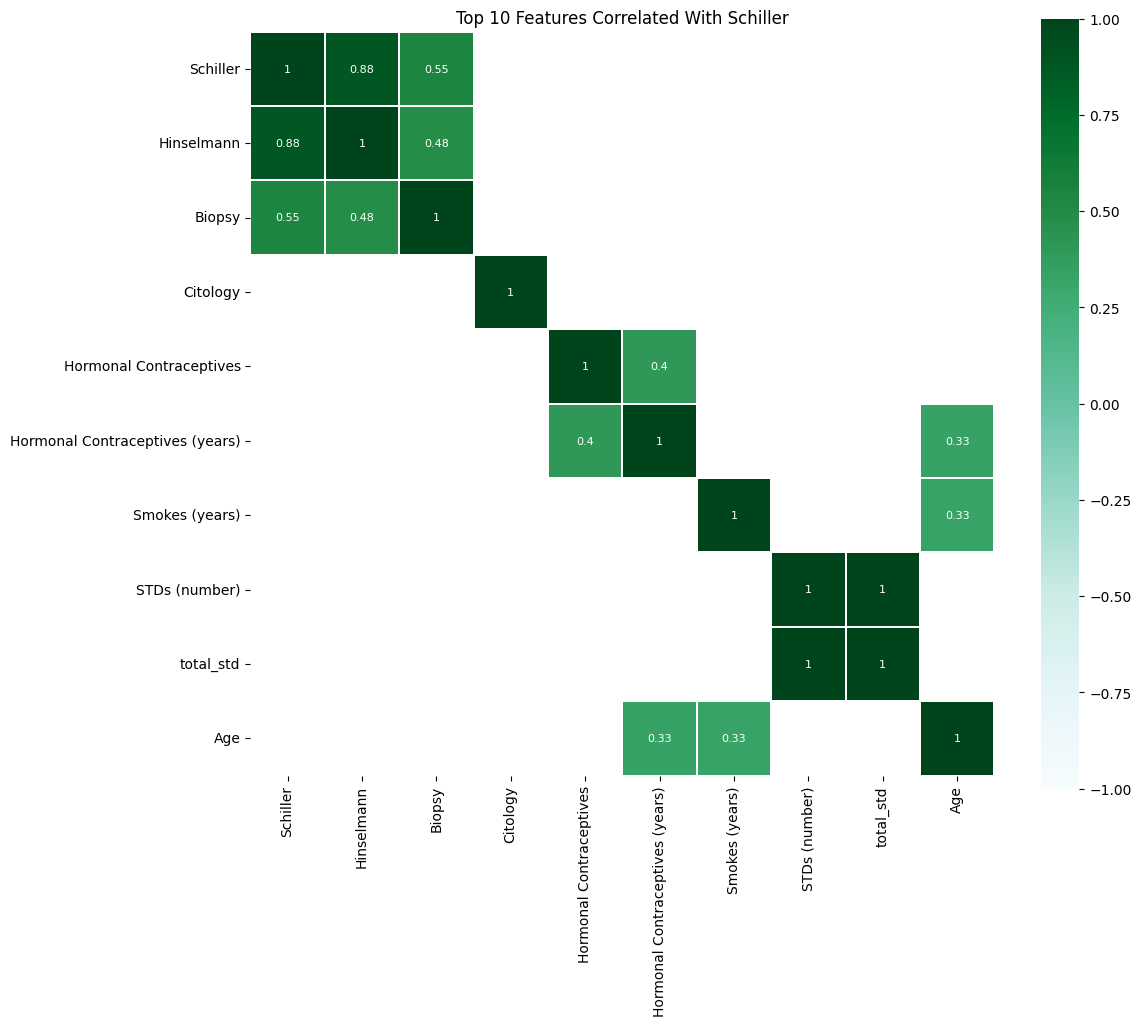

In [45]:
n = 10
corr = df.select_dtypes(include=np.number).corr()
x = corr.nlargest(n,"Schiller").index
corr_df =  df[list(x)]
corr = corr_df.corr()
plt.figure(figsize=(12, 10))
plt.title("Top "+str(n)+" Features Correlated With "+str("Schiller").capitalize())
sns.heatmap(corr[(corr >= 0.2) | (corr <= -0.2)],cmap='BuGn', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True)

### Visualizing the imbalance of data

(array([840.,   0., 808.]),
 array([0. , 0.2, 0.8, 1. ]),
 <BarContainer object of 3 artists>)

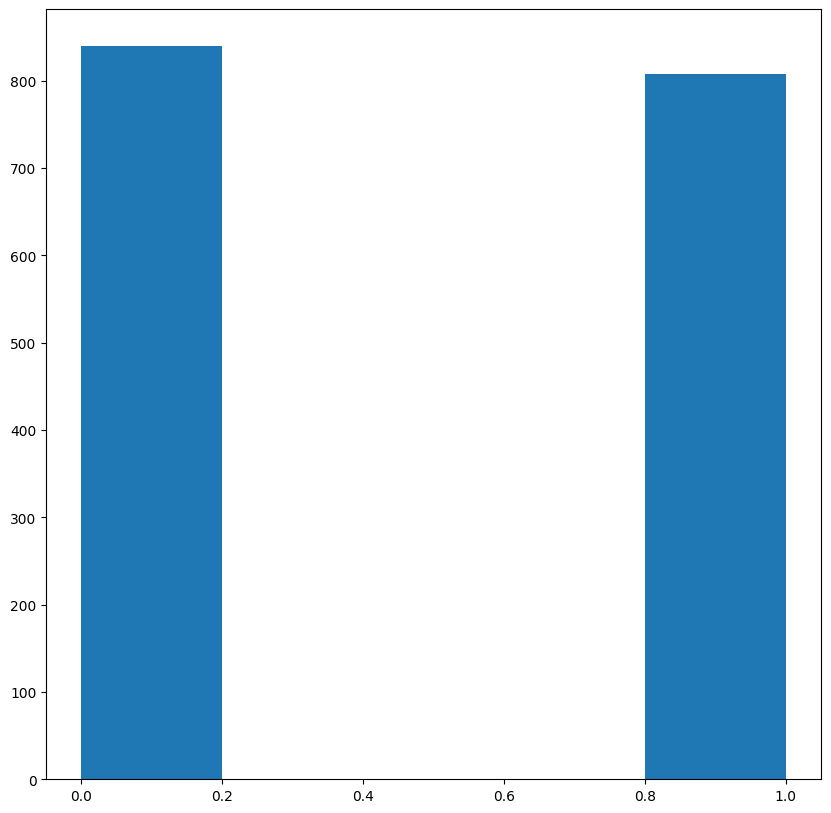

In [46]:
plt.figure(figsize = (10,10))
plt.hist(df["Schiller"],bins=[0, 0.2, 0.8, 1])

##### Data is almost balanced

In [47]:
X = df.drop(["Schiller",], axis=1)
y = df["Schiller"].copy()

## Train - Test Split

### We split the train and test by stratifying the age category

In [48]:
train_set = None
test_set = None 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_idx, test_idx in split.split(df, df["age_cat"]):
    train_set = df.loc[train_idx]
    test_set = df.loc[test_idx]

#### Drop the extra columns added

In [49]:
cols_to_drop = ["age_cat","total_std"]
for set_ in (train_set, test_set):
    for col in cols_to_drop:
        set_.drop(col, axis=1, inplace=True)

#### Split input and output of train and test data

In [50]:
X_train = train_set.drop("Schiller", axis=1)
y_train = train_set["Schiller"].copy()

X_test = test_set.drop("Schiller", axis=1)
y_test = test_set["Schiller"].copy()

## PCA Visualization

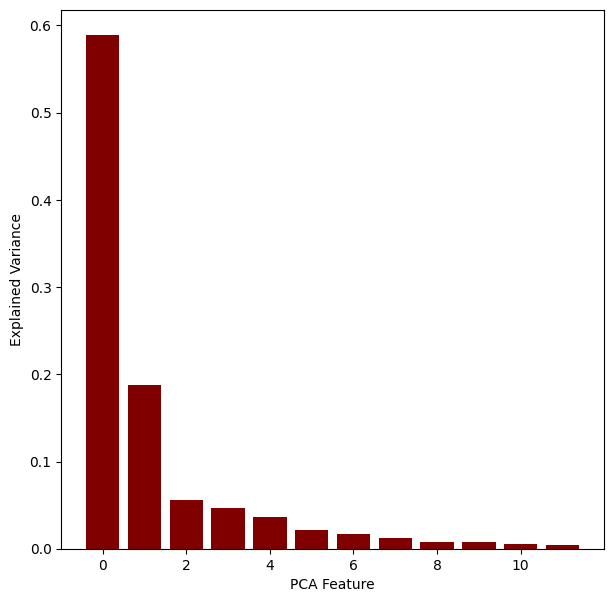

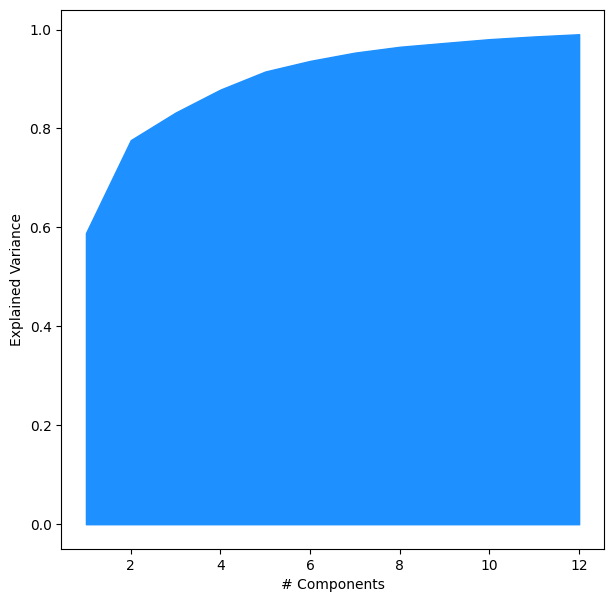

In [51]:
XT = RobustScaler().fit_transform(X_train)
pca = PCA(n_components=0.99)
XT = pca.fit_transform(XT)

fig = plt.figure(figsize = (7, 7))
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_,color="maroon")
plt.xlabel("PCA Feature")
plt.ylabel("Explained Variance")
plt.show()

exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize = (7, 7))
plt.fill_between(range(1, exp_var_cumul.shape[0] + 1),exp_var_cumul,color = "dodgerblue")
plt.xlabel("# Components")
plt.ylabel("Explained Variance")
plt.show()

#### Only 12 features contribute more than 99%, hence we consider only them

In [52]:
pipeline = Pipeline([
    ("scaler", RobustScaler()),
    ("pca", PCA(n_components=12))
])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Classifiers

### kNN

In [53]:
knn_clf2 = KNeighborsClassifier()
knn_param_grid2 = {"n_neighbors": list(np.arange(1, 15, 1))}
knn_clf_cv2 = GridSearchCV(knn_clf2, knn_param_grid2, cv=10)

### SVC

In [54]:
svm_clf2 = SVC()
svc_param_grid2 = {'C': np.logspace(-2, 4, 10), 'gamma': np.logspace(-2, 4, 10), }
svm_clf_cv2 = GridSearchCV(svm_clf2, svc_param_grid2, cv=5)

#### Making predictions and finding scores

In [55]:
estimators = [
    ("KNeighborsClassifier", knn_clf_cv2),
    ("SupportVectorClassifier", svm_clf_cv2)]

In [56]:
for i in range(0, len(estimators)):
    clf_name = estimators[i][0]
    clf = estimators[i][1]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    est_name.append(estimators[i][0])
    est_acc.append(accuracy_score(y_test, y_pred))
    target.append("Schiller")
    scores = precision_recall_fscore_support(y_test, y_pred, average="weighted")
    precision_score.append(scores[0])
    recall_score.append(scores[1])
    f1score.append(scores[2])
    est_conf_matrix.append(confusion_matrix(y_test,y_pred))

# Target 3 : Citology

#### Co-relation with other features

<AxesSubplot:title={'center':'Top 10 Features Correlated With Citology'}>

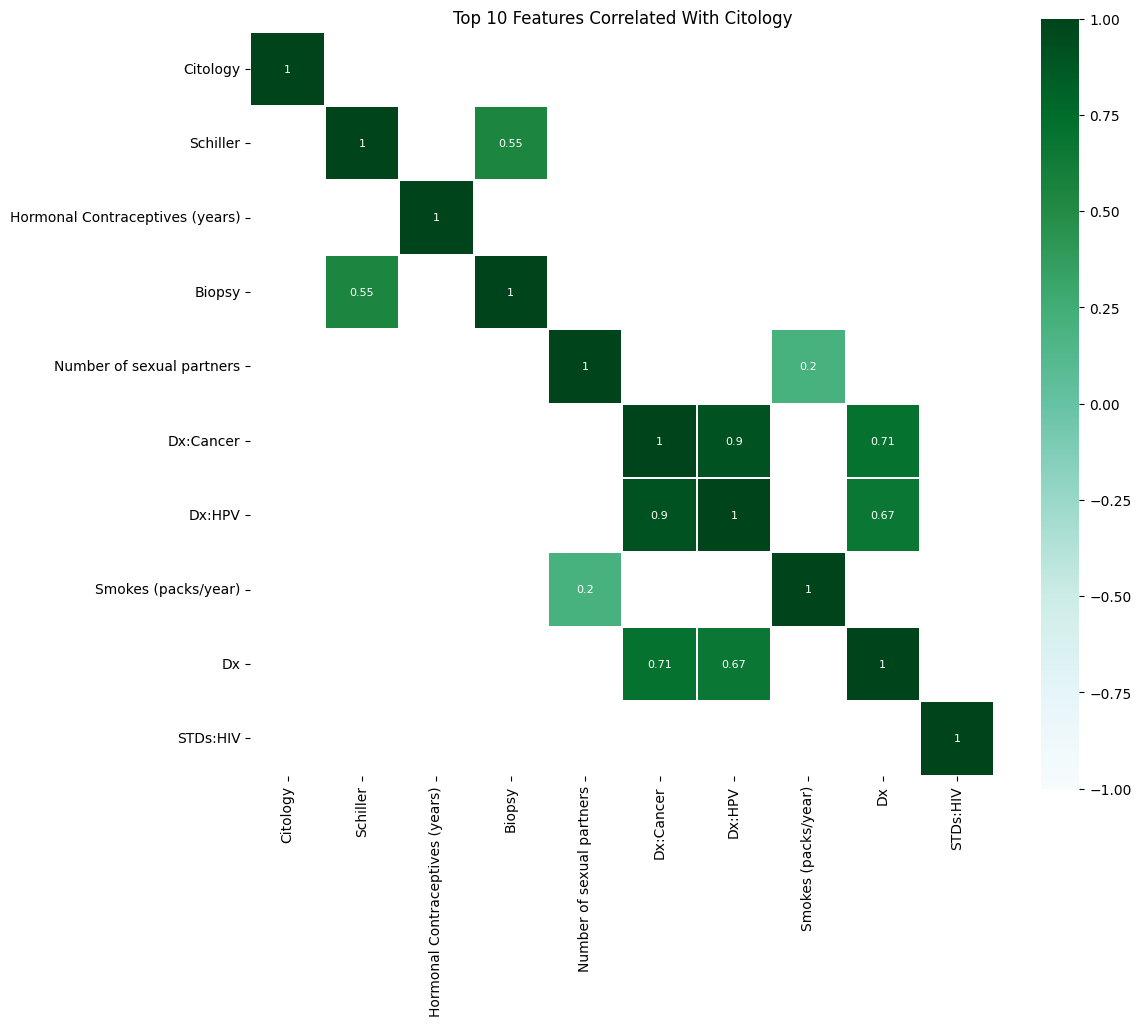

In [57]:
n = 10
corr = df.select_dtypes(include=np.number).corr()
x = corr.nlargest(n,"Citology").index
corr_df =  df[list(x)]
corr = corr_df.corr()
plt.figure(figsize=(12, 10))
plt.title("Top "+str(n)+" Features Correlated With "+str("Citology").capitalize())
sns.heatmap(corr[(corr >= 0.2) | (corr <= -0.2)],cmap='BuGn', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True)

### Visualizing the imbalance of data

(array([1566.,    0.,   82.]),
 array([0. , 0.2, 0.8, 1. ]),
 <BarContainer object of 3 artists>)

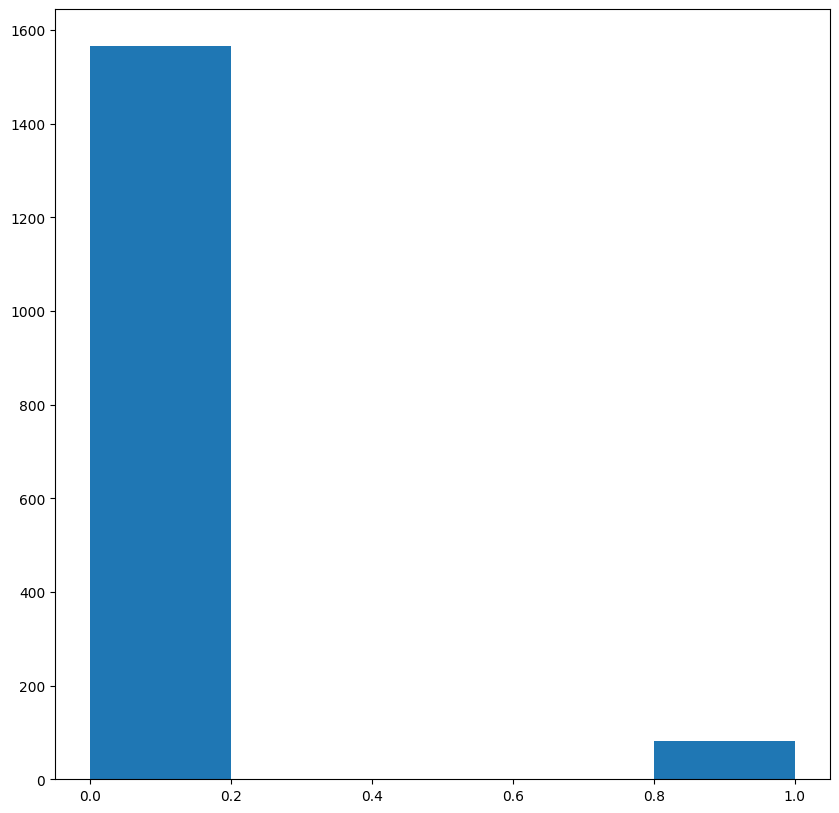

In [58]:
plt.figure(figsize = (10,10))
plt.hist(df["Citology"],bins=[0, 0.2, 0.8, 1])

##### We see high imbalance in data

In [59]:
X = df.drop(["Citology", "age_cat"], axis=1)
y = df["Citology"].copy()

### Balancing the Data

In [60]:
adasyn = ADASYN(random_state=42)
x_adasyn,y_adasyn = adasyn.fit_resample(X,y)
df = x_adasyn.join(y_adasyn)

Again, add Age_categorization field (Used in train - test split)

In [61]:
df["age_cat"] = df["Age"].apply(age_cat)

### Visualizing the balance of data

(array([1566.,    0., 1563.]),
 array([0. , 0.2, 0.8, 1. ]),
 <BarContainer object of 3 artists>)

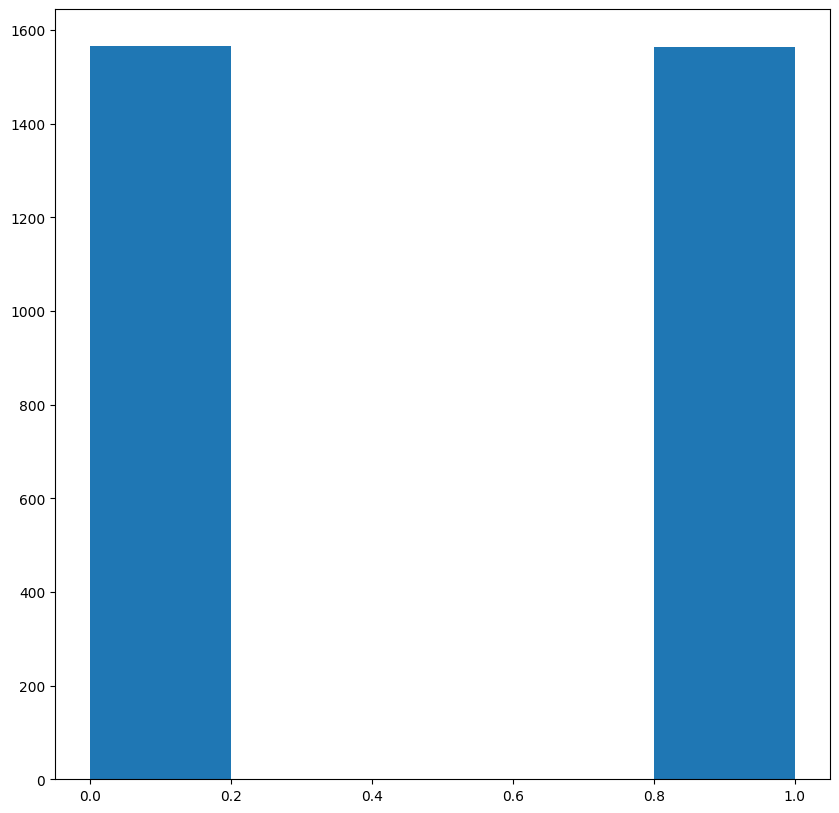

In [62]:
plt.figure(figsize = (10,10))
plt.hist(df["Citology"],bins=[0, 0.2, 0.8, 1])

## Train - Test Split

### We split the train and test by stratifying the age category

In [63]:
train_set = None
test_set = None 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
for train_idx, test_idx in split.split(df, df["age_cat"]):
    train_set = df.loc[train_idx]
    test_set = df.loc[test_idx]

#### Drop the extra columns added

In [64]:
cols_to_drop = ["age_cat","total_std"]
for set_ in (train_set, test_set):
    for col in cols_to_drop:
        set_.drop(col, axis=1, inplace=True)

#### Split input and output of train and test data

In [65]:
X_train = train_set.drop("Citology", axis=1)
y_train = train_set["Citology"].copy()

X_test = test_set.drop("Citology", axis=1)
y_test = test_set["Citology"].copy()

## PCA Visualization

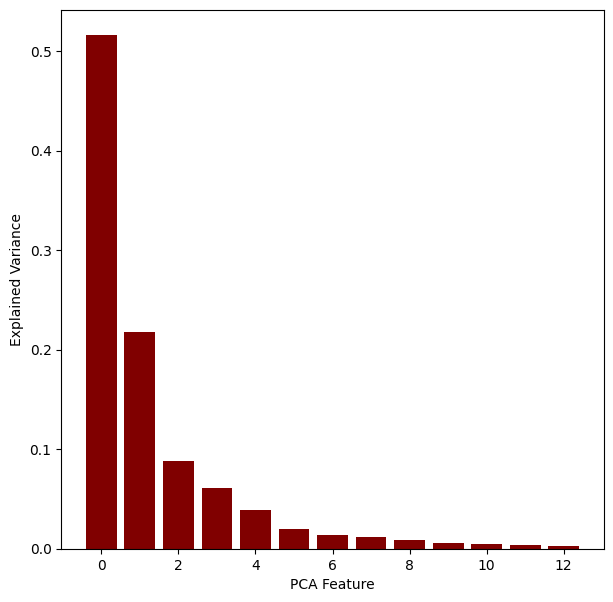

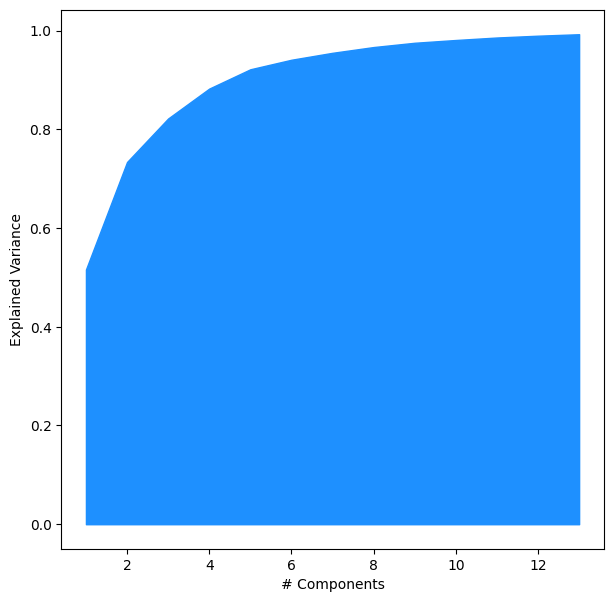

In [66]:
XT = RobustScaler().fit_transform(X_train)
pca = PCA(n_components=0.99)
XT = pca.fit_transform(XT)

fig = plt.figure(figsize = (7, 7))
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_,color="maroon")
plt.xlabel("PCA Feature")
plt.ylabel("Explained Variance")
plt.show()

exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize = (7, 7))
plt.fill_between(range(1, exp_var_cumul.shape[0] + 1),exp_var_cumul,color = "dodgerblue")
plt.xlabel("# Components")
plt.ylabel("Explained Variance")
plt.show()

#### Only 12 features contribute more than 99%, hence we consider only them

In [67]:
pipeline = Pipeline([
    ("scaler", RobustScaler()),
    ("pca", PCA(n_components=12))
])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Classifiers

### kNN

In [68]:
knn_clf3 = KNeighborsClassifier()
knn_param_grid3 = {"n_neighbors": list(np.arange(1, 10, 1))}
knn_clf_cv3 = GridSearchCV(knn_clf3, knn_param_grid3, cv=10)

### SVC

In [69]:
svm_clf3 = SVC()
svc_param_grid3 = {'C': np.logspace(-2, 4, 10), 'gamma': np.logspace(-2, 4, 10), }
svm_clf_cv3 = GridSearchCV(svm_clf3, svc_param_grid3, cv=5)

#### Making predictions and finding scores

In [70]:
estimators = [
    ("KNeighborsClassifier", knn_clf_cv3),
    ("SupportVectorClassifier", svm_clf_cv3)]

In [71]:
for i in range(0, len(estimators)):
    clf_name = estimators[i][0]
    clf = estimators[i][1]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    est_name.append(estimators[i][0])
    est_acc.append(accuracy_score(y_test, y_pred))
    target.append("Citology")
    scores = precision_recall_fscore_support(y_test, y_pred, average="weighted")
    precision_score.append(scores[0])
    recall_score.append(scores[1])
    f1score.append(scores[2])
    est_conf_matrix.append(confusion_matrix(y_test,y_pred))

# Target 4 : Biopsy

#### Co-relation with other features

<AxesSubplot:title={'center':'Top 10 Features Correlated With Biopsy'}>

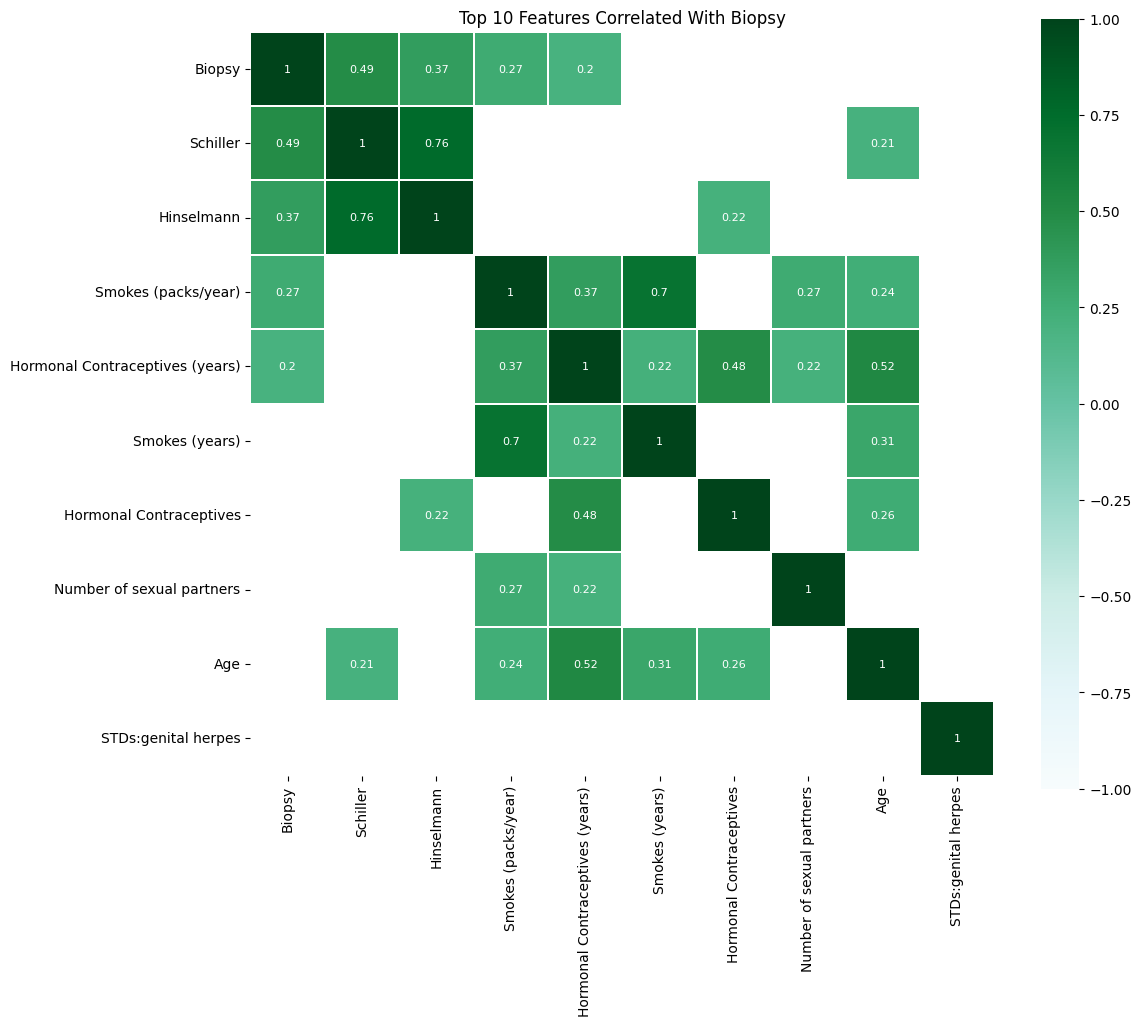

In [72]:
n = 10
corr = df.select_dtypes(include=np.number).corr()
x = corr.nlargest(n,"Biopsy").index
corr_df =  df[list(x)]
corr = corr_df.corr()
plt.figure(figsize=(12, 10))
plt.title("Top "+str(n)+" Features Correlated With "+str("Biopsy").capitalize())
sns.heatmap(corr[(corr >= 0.2) | (corr <= -0.2)],cmap='BuGn', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True)

### Visualizing the imbalance of data

(array([2387.,    0.,  742.]),
 array([0. , 0.2, 0.8, 1. ]),
 <BarContainer object of 3 artists>)

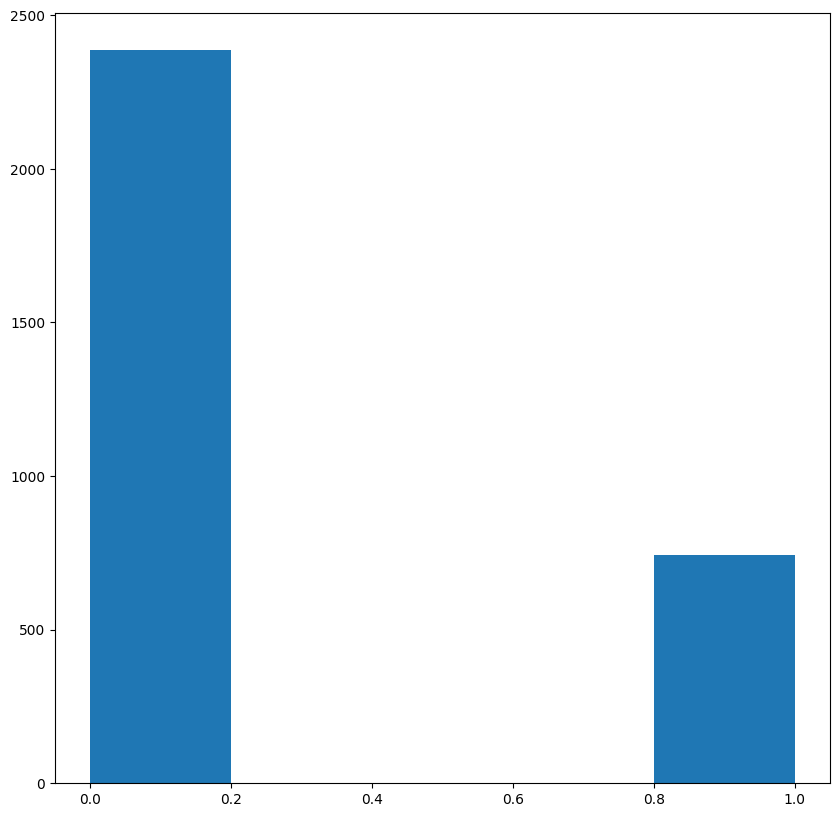

In [73]:
plt.figure(figsize = (10,10))
plt.hist(df["Biopsy"],bins=[0, 0.2, 0.8, 1])

##### We see high imbalance in data

In [74]:
X = df.drop(["Biopsy", "age_cat"], axis=1)
y = df["Biopsy"].copy()

### Balancing the Data

In [75]:
adasyn = ADASYN(random_state=42)
x_adasyn,y_adasyn = adasyn.fit_resample(X,y)
df = x_adasyn.join(y_adasyn)

Again, add Age_categorization field (Used in train - test split)

In [76]:
df["age_cat"] = df["Age"].apply(age_cat)

### Visualizing the balance of data

(array([2387.,    0., 2396.]),
 array([0. , 0.2, 0.8, 1. ]),
 <BarContainer object of 3 artists>)

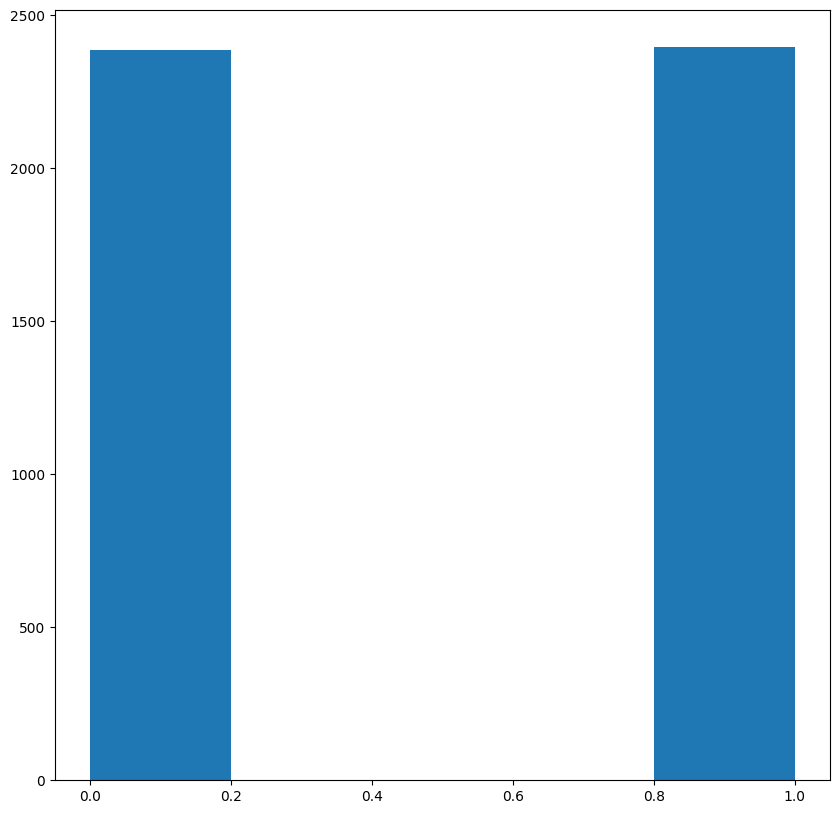

In [77]:
plt.figure(figsize = (10,10))
plt.hist(df["Biopsy"],bins=[0, 0.2, 0.8, 1])

## Train - Test Split

### We split the train and test by stratifying the age category

In [78]:
train_set = None
test_set = None 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(df, df["age_cat"]):
    train_set = df.loc[train_idx]
    test_set = df.loc[test_idx]

#### Drop the extra columns added

In [79]:
cols_to_drop = ["age_cat","total_std"]
for set_ in (train_set, test_set):
    for col in cols_to_drop:
        set_.drop(col, axis=1, inplace=True)

#### Split input and output of train and test data

In [80]:
X_train = train_set.drop("Biopsy", axis=1)
y_train = train_set["Biopsy"].copy()

X_test = test_set.drop("Biopsy", axis=1)
y_test = test_set["Biopsy"].copy()

## PCA Visualization

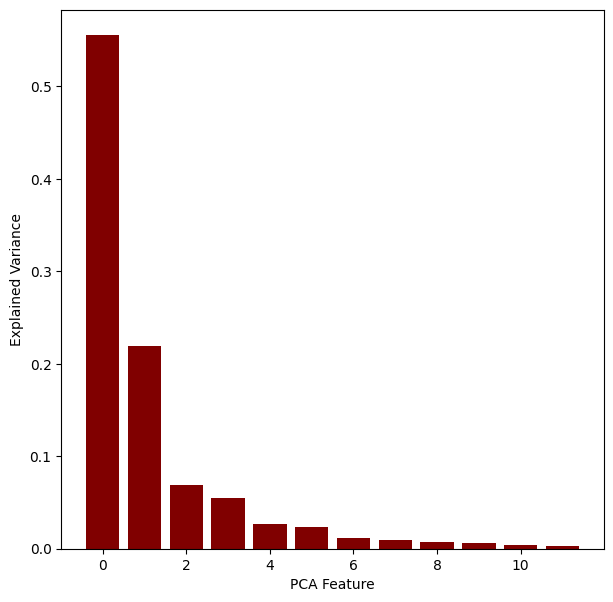

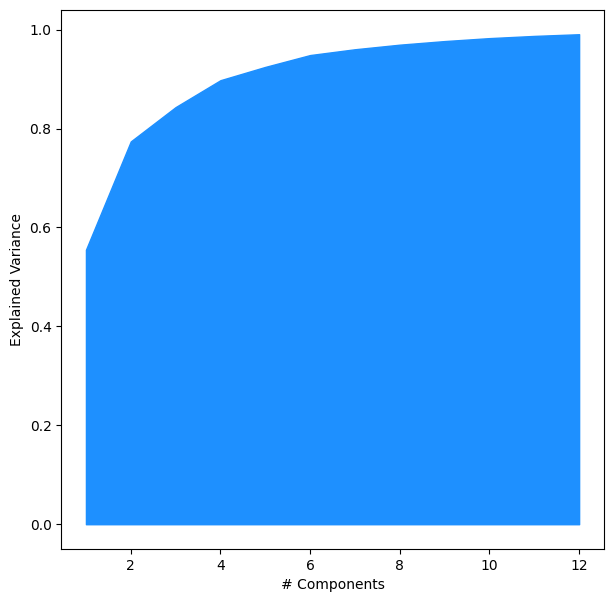

In [81]:
XT = RobustScaler().fit_transform(X_train)
pca = PCA(n_components=0.99)
XT = pca.fit_transform(XT)

fig = plt.figure(figsize = (7, 7))
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_,color="maroon")
plt.xlabel("PCA Feature")
plt.ylabel("Explained Variance")
plt.show()

exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize = (7, 7))
plt.fill_between(range(1, exp_var_cumul.shape[0] + 1),exp_var_cumul,color = "dodgerblue")
plt.xlabel("# Components")
plt.ylabel("Explained Variance")
plt.show()

#### Only 12 features contribute more than 99%, hence we consider only them

In [82]:
pipeline = Pipeline([
    ("scaler", RobustScaler()),
    ("pca", PCA(n_components=12))
])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Classifiers

### kNN

In [83]:
knn_clf4 = KNeighborsClassifier()
knn_param_grid4 = {"n_neighbors": list(np.arange(1, 10, 1))}
knn_clf_cv4 = GridSearchCV(knn_clf4, knn_param_grid4, cv=10)

### SVC

In [84]:
svm_clf4 = SVC()
svc_param_grid4 = {'C': np.logspace(-2, 4, 10), 'gamma': np.logspace(-2, 4, 10), }
svm_clf_cv4 = GridSearchCV(svm_clf4, svc_param_grid4, cv=5)

#### Making predictions and finding scores

In [85]:
estimators = [
    ("KNeighborsClassifier", knn_clf_cv4),
    ("SupportVectorClassifier", svm_clf_cv4)]

In [86]:
for i in range(0, len(estimators)):
    clf_name = estimators[i][0]
    clf = estimators[i][1]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    est_name.append(estimators[i][0])
    est_acc.append(accuracy_score(y_test, y_pred))
    target.append("Biopsy")
    scores = precision_recall_fscore_support(y_test, y_pred, average="weighted")
    precision_score.append(scores[0])
    recall_score.append(scores[1])
    f1score.append(scores[2])
    est_conf_matrix.append(confusion_matrix(y_test,y_pred))

In [87]:
summary_df[col_names[0]] = target
summary_df[col_names[1]] = est_name
summary_df[col_names[2]] = est_acc
summary_df[col_names[3]] = precision_score
summary_df[col_names[4]] = recall_score
summary_df[col_names[5]] = f1score

# Confusion Matrix

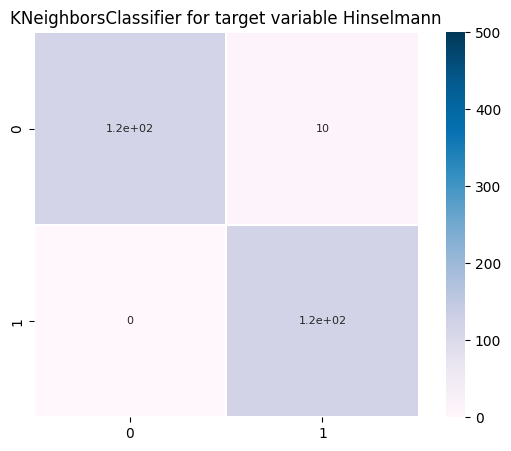

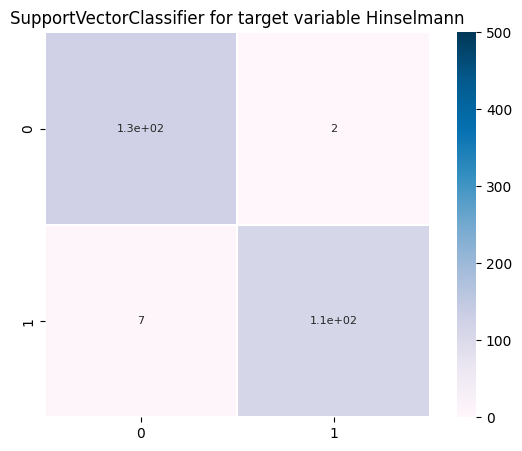

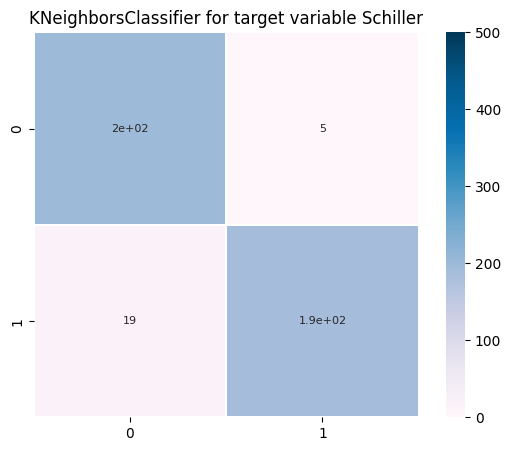

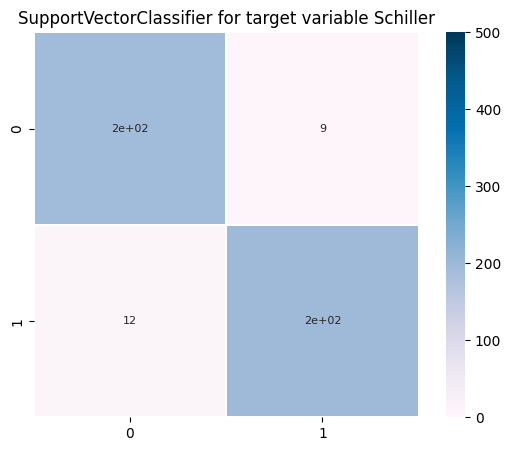

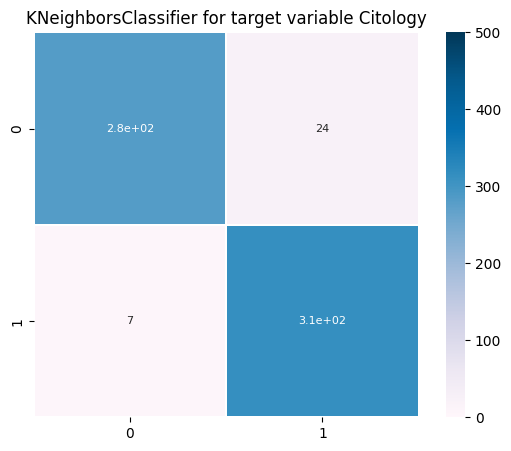

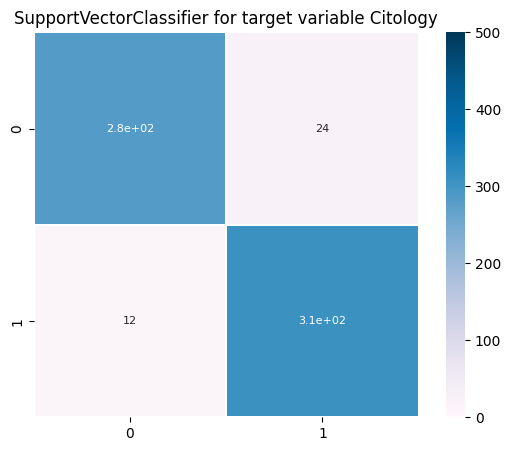

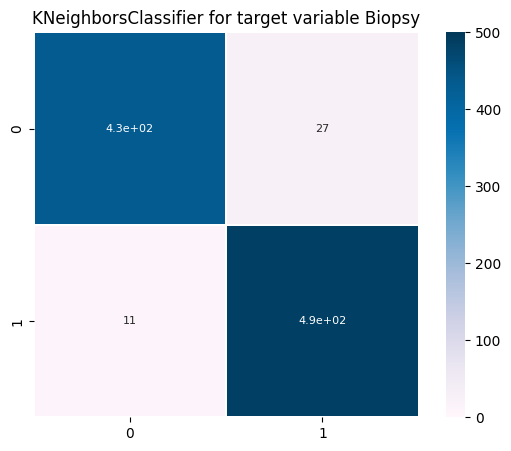

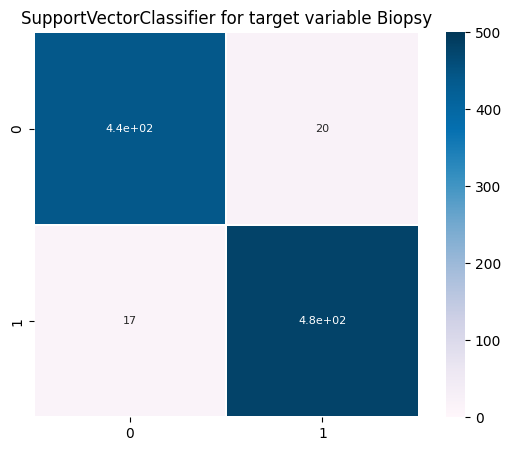

In [88]:
for i in range(0,len(est_conf_matrix)):
    plt.figure(figsize=(7, 5))
    plt.title(str(est_name[i]) + " for target variable " + str(target[i]) )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    sns.heatmap(est_conf_matrix[i], cmap='PuBu', vmax=500.0, vmin=0.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True)

# Evaluation Results

In [89]:
summary_df

,Target,Classifier Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Hinselmann,KNeighborsClassifier,0.959677,0.962779,0.959677,0.959664
1,Hinselmann,SupportVectorClassifier,0.963710,0.964420,0.963710,0.963671
2,Schiller,KNeighborsClassifier,0.941748,0.943833,0.941748,0.941699
3,Schiller,SupportVectorClassifier,0.949029,0.949132,0.949029,0.949030
4,Citology,KNeighborsClassifier,0.950479,0.951755,0.950479,0.950412
5,Citology,SupportVectorClassifier,0.942492,0.943095,0.942492,0.942446
6,Biopsy,KNeighborsClassifier,0.960293,0.960758,0.960293,0.960256
7,Biopsy,SupportVectorClassifier,0.961338,0.961346,0.961338,0.961332
